In [8]:
import sys

sys.path.append("../")

### 创建动力学模型

In [9]:
from zjb.main.api import DynamicsModel

# 使用内建的SupHopf模型
dynamics = DynamicsModel.from_name("SupHopf")

### 创建/导入图谱

In [10]:
from zjb.main.api import Atlas

# 虚构一个具有100分区的图谱
atlas = Atlas(labels=[f"{i}" for i in range(100)])

### 创建数字孪生脑模型

#### 创建监测器

In [11]:
from zjb.main.api import Raw

# 使用Raw监测器输出变量x
monitor = Raw(expression="x")

In [12]:
from zjb.main.api import DTBModel

model = DTBModel(atlas=atlas, dynamics=dynamics, monitors=[monitor])
# 设置状态变量初值
model.states = {
    "x": 0.1,
    "y": 0.1
}
# 设置非默认的动力学参数
model.parameters = {
    "a": -0.1
}
# 设置默认仿真时间为100(默认值1000)
model.t = 100

In [13]:
# 设置求解器

### 创建被试

#### 导入结构连接

In [14]:
from zjb.main.data.correlation import StructuralConnectivity
import numpy as np
import io

buffer = io.BytesIO()
# 随机生成一个结构连接(仅用于示例)
np.save(buffer, np.random.rand(100, 100) / 10)
buffer.seek(0)
# 从文件导入一个结构连接
conn = StructuralConnectivity.from_npy(buffer, atlas.space)

In [15]:
from zjb.main.api import Subject

subject = Subject()
# 存入结构连接到被试数据
subject.data |= {"SC": conn}

### 创建数字孪生脑

In [16]:
from zjb.main.api import DTB

dtb = DTB(subject=subject, model=model, connectivity=subject.data["SC"])

### 运行数字孪生脑仿真

In [17]:
result = dtb.simulate()

### 查看仿真结果

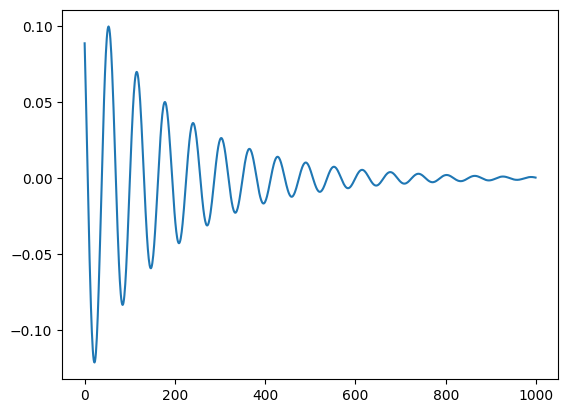

In [18]:
from matplotlib import pyplot as plt

# [0]对应第一个监测器的结果
ts = result.data[0]
plt.plot(ts.data[:, 0])
plt.show()